In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Load dataset
df = pd.read_csv('/content/sample_data/Pak_pop.csv')

# Data Cleaning
df["Population"] = df["Population"].astype(str).str.replace(",", "").astype(int)
df["Year"] = df["Year"].astype(int)

# Sorting by Year
df.sort_values(by="Year", inplace=True)

# Splitting data
X = df["Year"].values.reshape(-1, 1)  # Predictor
Y = df["Population"].values          # Target
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)


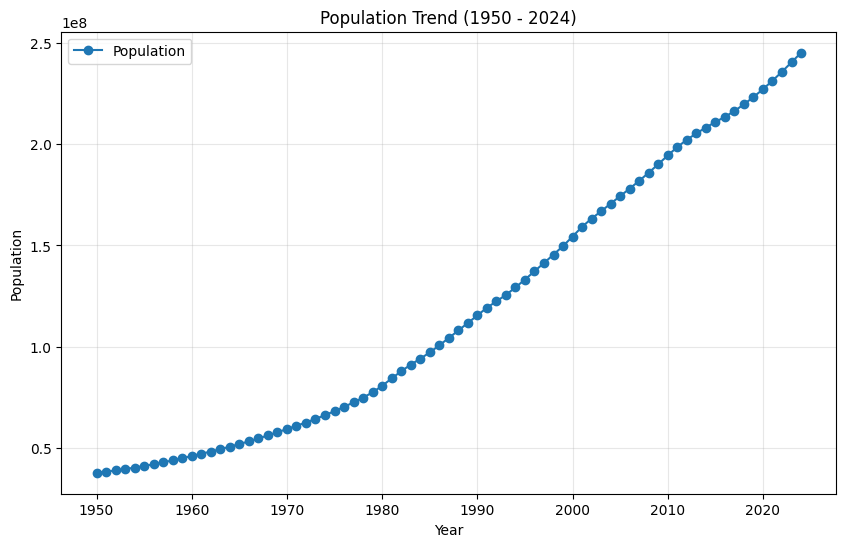

In [2]:
import matplotlib.pyplot as plt

# Line plot for population trends
plt.figure(figsize=(10, 6))
plt.plot(df["Year"], df["Population"], marker="o", label="Population")
plt.title("Population Trend (1950 - 2024)")
plt.xlabel("Year")
plt.ylabel("Population")
plt.legend()
plt.grid(alpha=0.3)
plt.show()


In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

# Train the model
model = LinearRegression()
model.fit(X_train, Y_train)

# Predictions
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# Save predictions
train_df = pd.DataFrame({"Year": X_train.flatten(), "Actual": Y_train, "Predicted": train_predictions})
test_df = pd.DataFrame({"Year": X_test.flatten(), "Actual": Y_test, "Predicted": test_predictions})
train_df.to_csv("train_predictions.csv", index=False)
test_df.to_csv("test_predictions.csv", index=False)


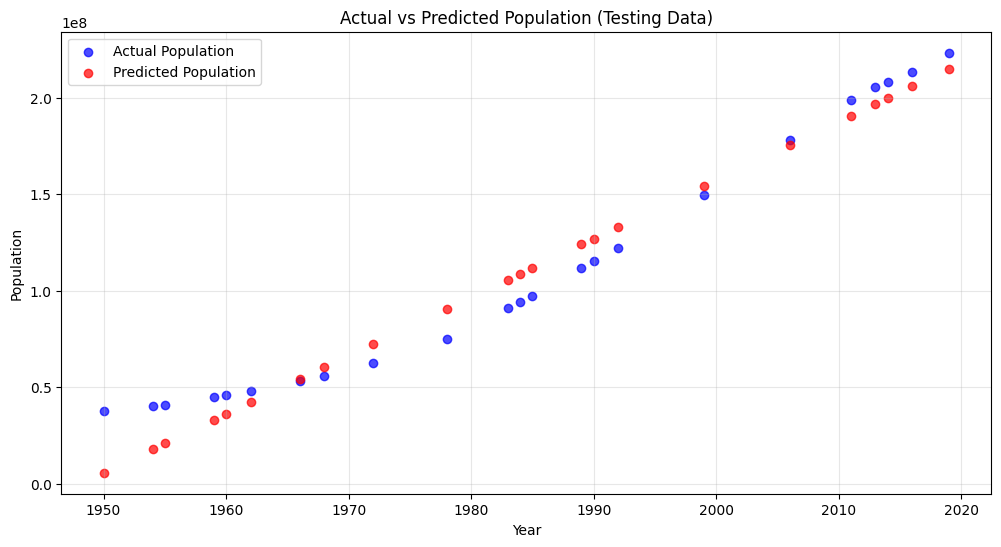

Mean Absolute Error: 11316741.64
Model Accuracy on Testing Data: 89.64%


In [4]:
# Scatter Plot: Actual vs Predicted
plt.figure(figsize=(12, 6))
plt.scatter(test_df["Year"], test_df["Actual"], label="Actual Population", color="blue", alpha=0.7)
plt.scatter(test_df["Year"], test_df["Predicted"], label="Predicted Population", color="red", alpha=0.7)
plt.title("Actual vs Predicted Population (Testing Data)")
plt.xlabel("Year")
plt.ylabel("Population")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# Evaluation Metrics
test_mae = mean_absolute_error(test_df["Actual"], test_df["Predicted"])
test_accuracy = 100 - (test_mae / np.mean(test_df["Actual"])) * 100

print(f"Mean Absolute Error: {test_mae:.2f}")
print(f"Model Accuracy on Testing Data: {test_accuracy:.2f}%")


In [5]:
# Predict future populations
future_years = np.array([2025, 2030, 2035, 2040]).reshape(-1, 1)
future_populations = model.predict(future_years)

# Display predictions
for year, pop in zip(future_years.flatten(), future_populations):
    print(f"Predicted Population for {year}: {int(pop):,}")


Predicted Population for 2025: 233,081,743
Predicted Population for 2030: 248,234,460
Predicted Population for 2035: 263,387,176
Predicted Population for 2040: 278,539,893
